In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Transport.csv')

In [3]:
df.head(2)

,Customer,Truck_ID,Service_Type,Distance_Category,Fuel_Cost,Driver_Salary,Maintenance_Cost,Freight_Weight,Revenue
0,"Rodriguez, King and Hawkins",Truck_130,Less Than Truckload,Short Haul,4763.319422,5502.199055,2264.563249,21498,17502.250497
1,Hansen-Smith,Truck_71,Expedited,Medium Haul,2263.864207,4138.135882,3957.066121,47617,13487.109084


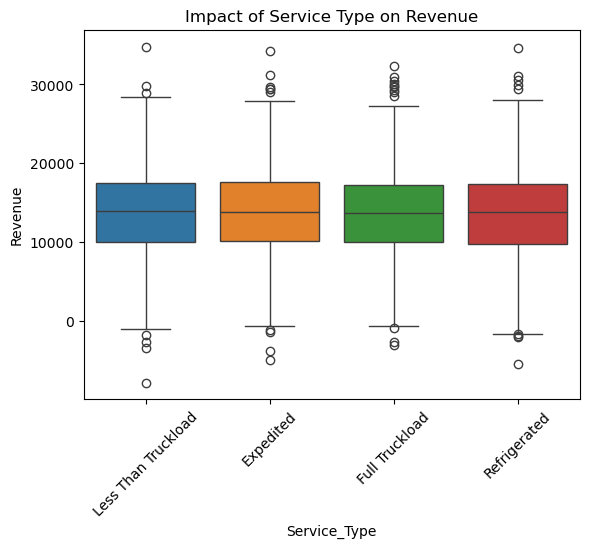

In [4]:
# Exploratory Data Analysis (EDA)
sns.boxplot(x="Service_Type", y="Revenue",hue='Service_Type', data=df)
plt.title("Impact of Service Type on Revenue")
plt.xticks(rotation=45)
plt.show()

In [5]:
df.columns

Index(['Customer', 'Truck_ID', 'Service_Type', 'Distance_Category',
       'Fuel_Cost', 'Driver_Salary', 'Maintenance_Cost', 'Freight_Weight',
       'Revenue'],
      dtype='object')

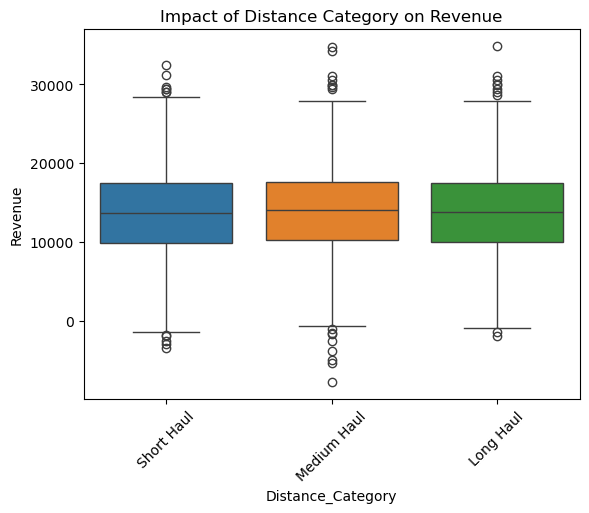

In [6]:
sns.boxplot(x="Distance_Category", y="Revenue",hue='Distance_Category', data=df)
plt.title("Impact of Distance Category on Revenue")
plt.xticks(rotation=45)
plt.show()

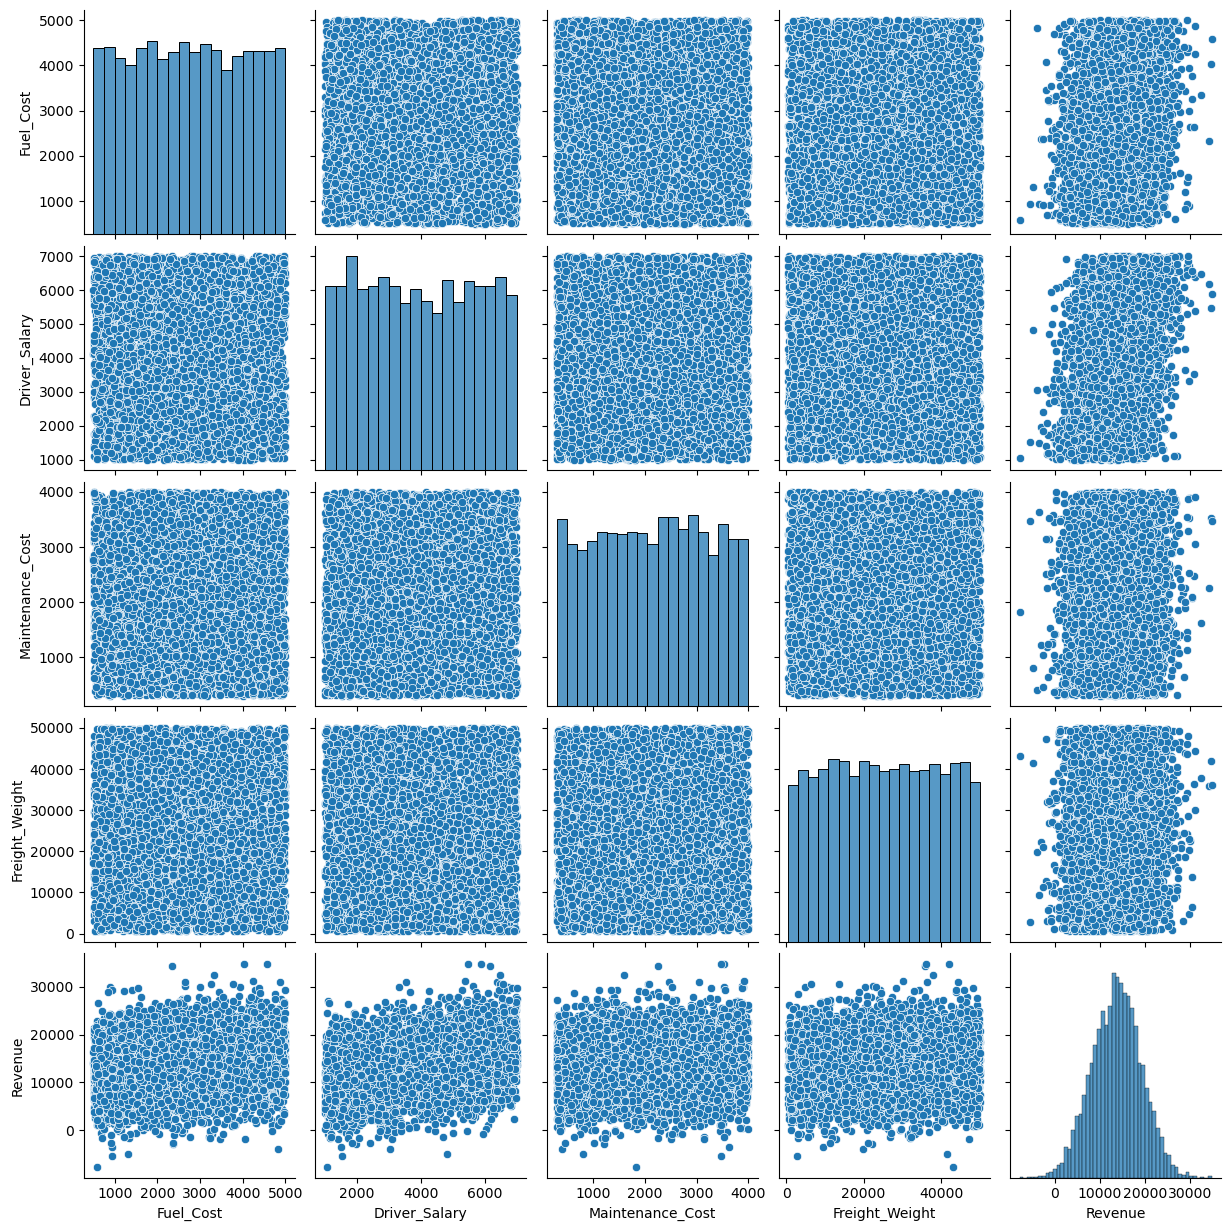

In [7]:
sns.pairplot(data=df)

In [8]:
df.columns

Index(['Customer', 'Truck_ID', 'Service_Type', 'Distance_Category',
       'Fuel_Cost', 'Driver_Salary', 'Maintenance_Cost', 'Freight_Weight',
       'Revenue'],
      dtype='object')

<Axes: xlabel='Fuel_Cost', ylabel='Revenue'>

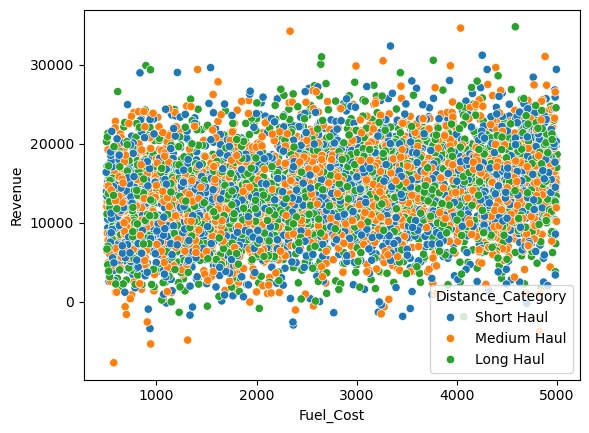

In [9]:
sns.scatterplot(df,x='Fuel_Cost', y='Revenue',hue='Distance_Category')

# Predictive Model: How Different Factors Influence Sales

In [11]:
# Predictive Model: How Different Factors Influence Sales
features = ["Fuel_Cost", "Driver_Salary", "Maintenance_Cost", "Freight_Weight"]
X = df[features]
y = df["Revenue"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 26891472.846668933
R-squared Score: 0.13038689166932171


In [16]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": features, "Importance": model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

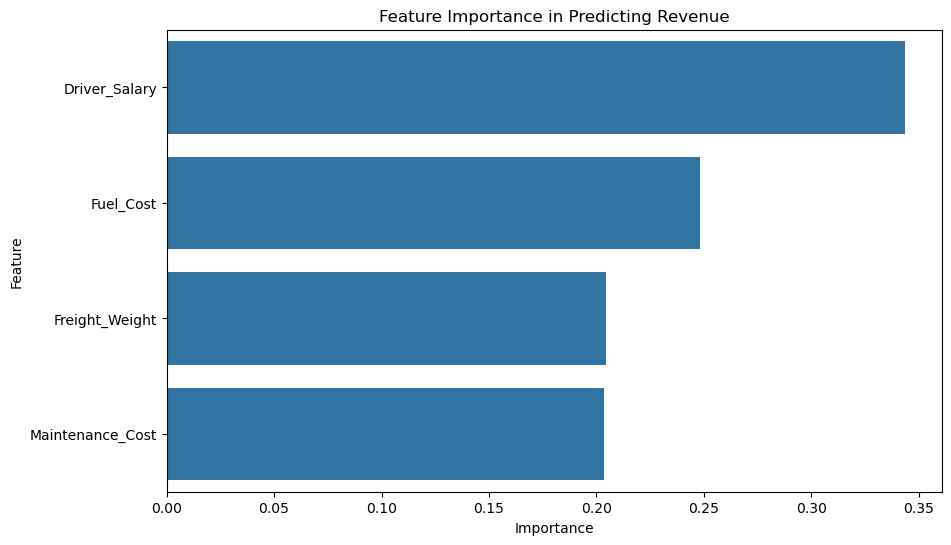

In [17]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance in Predicting Revenue")
plt.show()

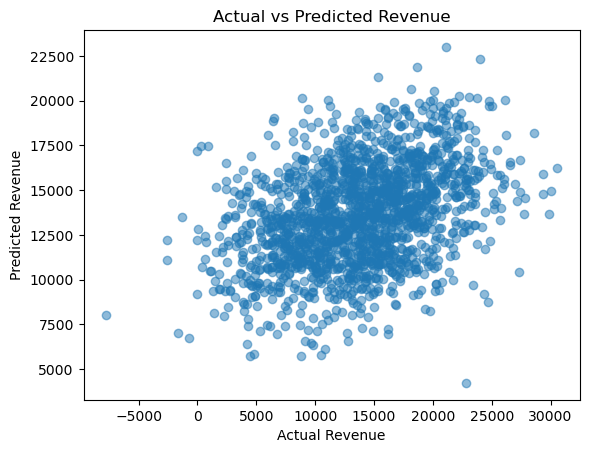

In [18]:
# Check Model Performance
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()